In [2]:
{
 "cells": [],
 "metadata": {},
 "nbformat": 4,
 "nbformat_minor": 5
}

{'cells': [], 'metadata': {}, 'nbformat': 4, 'nbformat_minor': 5}

# Importation des Bibliotheques

In [3]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns            
import plotly.express as px      
import numpy as np               
import requests

# Configuration de base pour Matplotlib et Seaborn
sns.set_style("whitegrid")       # Style de graphique pour Seaborn
plt.rcParams["figure.figsize"] = (12, 6)  # Taille par défaut des graphiques Matplotlib


# 1. Préparation et Exploration des Données

# ● Le chargement des données depuis les fichiers CSV sources

In [4]:
# URL des fichiers
urls = {
    "confirmed": "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
    "deaths": "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",
    "recovered": "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",
}

# Téléchargement des fichiers en les affaichant pour s'assurer qu'ils sont bien telecharges
for name, url in urls.items():
    response = requests.get(url)
    with open(f"data/{name}.csv", "wb") as file:
        file.write(response.content)
    print(f"{name}.csv téléchargé avec succès.")


confirmed.csv téléchargé avec succès.
deaths.csv téléchargé avec succès.
recovered.csv téléchargé avec succès.


In [31]:
# Chargement des données
confirmed = pd.read_csv("data/confirmed.csv")
deaths = pd.read_csv("data/deaths.csv")
recovered = pd.read_csv("data/recovered.csv")

# Aperçu des premières lignes
print("Cas confirmés :")
print(confirmed.head())
print("\nDécès :")
print(deaths.head())
print("\nPersonnes soignées :")
print(recovered.head())


Cas confirmés :
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  2

# ● Le nettoyage et la restructuration des données

In [32]:
# Colonnes inutiles
columns_to_drop = ['Lat', 'Long']

# Nettoyer les datasets
confirmed_cleaned = confirmed.drop(columns=columns_to_drop)
deaths_cleaned = deaths.drop(columns=columns_to_drop)
recovered_cleaned = recovered.drop(columns=columns_to_drop)

# Transformer en format long
confirmed_long = confirmed_cleaned.melt(id_vars=["Province/State", "Country/Region"], 
                                        var_name="Date", value_name="Confirmed")
deaths_long = deaths_cleaned.melt(id_vars=["Province/State", "Country/Region"], 
                                  var_name="Date", value_name="Deaths")
recovered_long = recovered_cleaned.melt(id_vars=["Province/State", "Country/Region"], 
                                        var_name="Date", value_name="Recovered")

# Fusionner les datasets
data = confirmed_long.merge(deaths_long, on=["Province/State", "Country/Region", "Date"])
data = data.merge(recovered_long, on=["Province/State", "Country/Region", "Date"])

# Convertir la colonne Date en format datetime
data["Date"] = pd.to_datetime(data["Date"])

# Aperçu des données restructurées
print(data.head())


  Province/State Country/Region       Date  Confirmed  Deaths  Recovered
0            NaN    Afghanistan 2020-01-22          0       0          0
1            NaN        Albania 2020-01-22          0       0          0
2            NaN        Algeria 2020-01-22          0       0          0
3            NaN        Andorra 2020-01-22          0       0          0
4            NaN         Angola 2020-01-22          0       0          0


C:\Users\hp 830 G5\AppData\Local\Temp\ipykernel_16636\132472832.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"])


In [54]:
# Regard globale
print(data)

       Province/State        Country/Region       Date  Confirmed  Deaths  \
0                 NaN           Afghanistan 2020-01-22          0       0   
1                 NaN               Albania 2020-01-22          0       0   
2                 NaN               Algeria 2020-01-22          0       0   
3                 NaN               Andorra 2020-01-22          0       0   
4                 NaN                Angola 2020-01-22          0       0   
...               ...                   ...        ...        ...     ...   
312034            NaN    West Bank and Gaza 2023-03-09     703228    5708   
312035            NaN  Winter Olympics 2022 2023-03-09        535       0   
312036            NaN                 Yemen 2023-03-09      11945    2159   
312037            NaN                Zambia 2023-03-09     343135    4057   
312038            NaN              Zimbabwe 2023-03-09     264276    5671   

        Recovered  
0               0  
1               0  
2              

In [7]:
# Supprimer les colonnes inutiles
columns_to_drop = ['Province/State', 'Lat', 'Long']
confirmed_cleaned = confirmed.drop(columns=columns_to_drop)
deaths_cleaned = deaths.drop(columns=columns_to_drop)
recovered_cleaned = recovered.drop(columns=columns_to_drop)

# Restructuration en format long
confirmed_long = confirmed_cleaned.melt(id_vars=["Country/Region"], var_name="Date", value_name="Confirmed")
deaths_long = deaths_cleaned.melt(id_vars=["Country/Region"], var_name="Date", value_name="Deaths")
recovered_long = recovered_cleaned.melt(id_vars=["Country/Region"], var_name="Date", value_name="Recovered")

# Fusion des datasets
data = confirmed_long.merge(deaths_long, on=["Country/Region", "Date"])
data = data.merge(recovered_long, on=["Country/Region", "Date"])

# Convertir la colonne Date en format datetime
data["Date"] = pd.to_datetime(data["Date"])

# Aperçu des données nettoyées
print(data.head())


C:\Users\hp 830 G5\AppData\Local\Temp\ipykernel_16636\3661922670.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  donnees["Date"] = pd.to_datetime(donnees["Date"])


  Country/Region       Date  Confirmed  Deaths  Recovered
0    Afghanistan 2020-01-22          0       0          0
1        Albania 2020-01-22          0       0          0
2        Algeria 2020-01-22          0       0          0
3        Andorra 2020-01-22          0       0          0
4         Angola 2020-01-22          0       0          0


# ● L'agrégation des données par pays et par région

In [33]:
# Agrégation par pays et date
aggregated_data = data.groupby(["Country/Region", "Date"]).sum().reset_index()

# Aperçu des données agrégées
print(aggregated_data.head())


  Country/Region       Date Province/State  Confirmed  Deaths  Recovered
0    Afghanistan 2020-01-22              0          0       0          0
1    Afghanistan 2020-01-23              0          0       0          0
2    Afghanistan 2020-01-24              0          0       0          0
3    Afghanistan 2020-01-25              0          0       0          0
4    Afghanistan 2020-01-26              0          0       0          0


# ● Le calcul des métriques dérivées importantes

In [59]:
# Calcul des métriques dérivées
aggregated_data["Mortality Rate (%)"] = (aggregated_data["Deaths"] / aggregated_data["Confirmed"]) * 100
aggregated_data["Recovery Rate (%)"] = (aggregated_data["Recovered"] / aggregated_data["Confirmed"]) * 100

# Remplacer les valeurs infinies ou NaN par 0
aggregated_data = aggregated_data.fillna(0)

# Aperçu avec les métriques
print(aggregated_data.head())


  Country/Region       Date Province/State  Confirmed  Deaths  Recovered  \
0    Afghanistan 2020-01-22              0          0       0          0   
1    Afghanistan 2020-01-23              0          0       0          0   
2    Afghanistan 2020-01-24              0          0       0          0   
3    Afghanistan 2020-01-25              0          0       0          0   
4    Afghanistan 2020-01-26              0          0       0          0   

   Mortality Rate (%)  Recovery Rate (%)  Daily Growth Rate (%) Region  \
0                 0.0                0.0                    0.0      0   
1                 0.0                0.0                    0.0      0   
2                 0.0                0.0                    0.0      0   
3                 0.0                0.0                    0.0      0   
4                 0.0                0.0                    0.0      0   

  Measures  
0        0  
1        0  
2        0  
3        0  
4        0  


# 2. Analyse des Cas et Décès

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



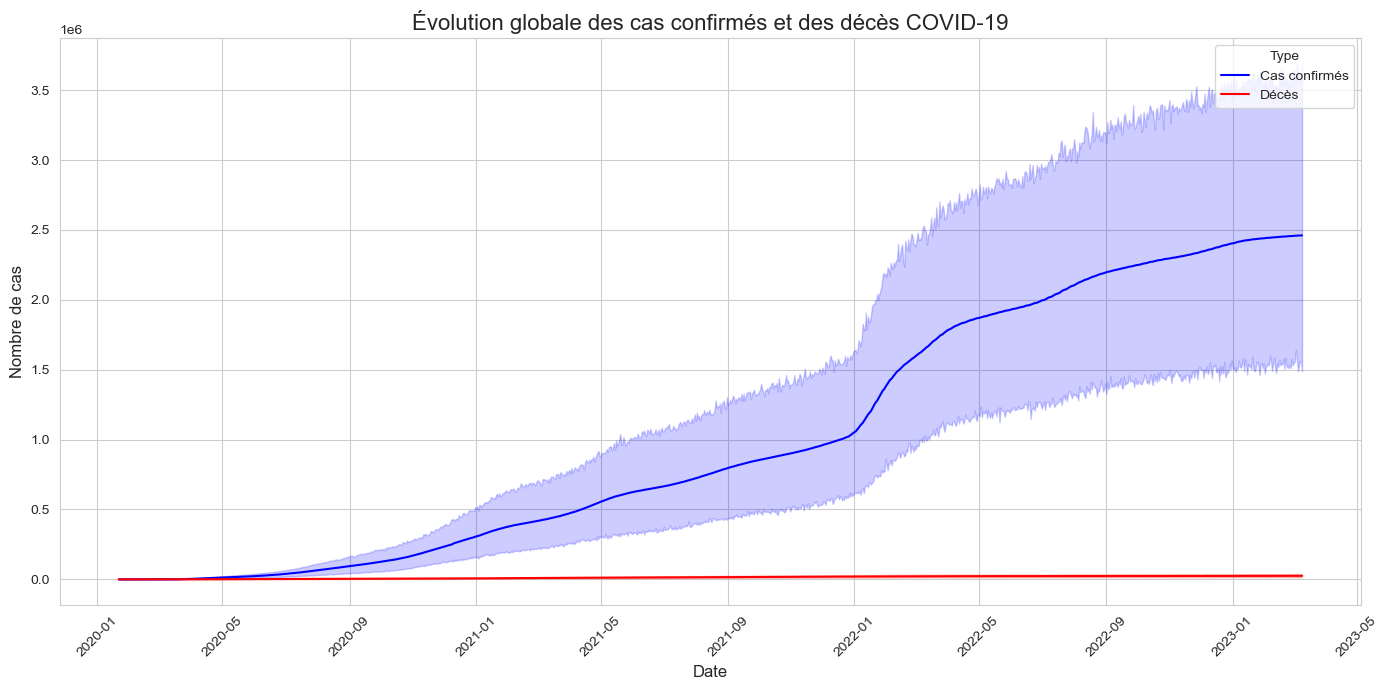

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique pour l'évolution globale
plt.figure(figsize=(14, 7))

# Tracer les cas confirmés
sns.lineplot(data=data, x="Date", y="Confirmed", label="Cas confirmés", color="blue")

# Tracer les décès
sns.lineplot(data=data, x="Date", y="Deaths", label="Décès", color="red")

# Ajouter des titres et légendes
plt.title("Évolution globale des cas confirmés et des décès COVID-19", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de cas", fontsize=12)
plt.legend(title="Type", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



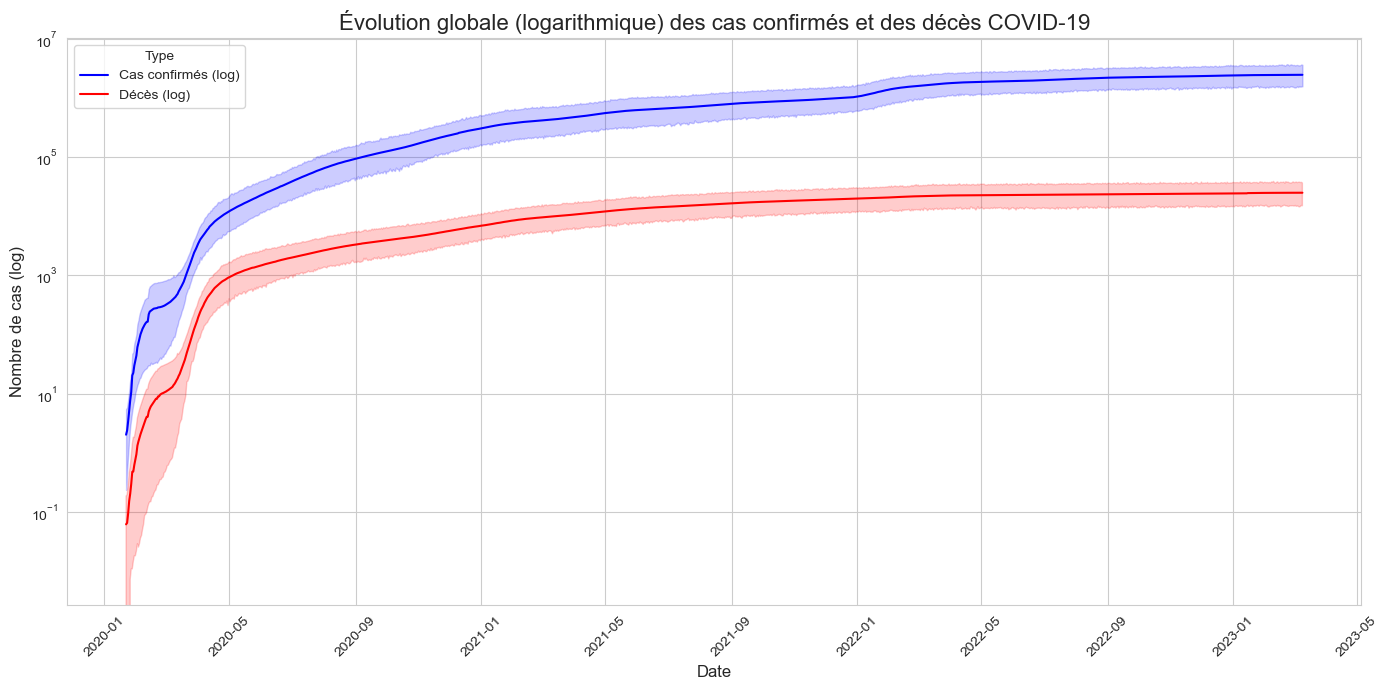

In [61]:
plt.figure(figsize=(14, 7))

# Tracer les cas confirmés (log)
sns.lineplot(data=data, x="Date", y="Confirmed", label="Cas confirmés (log)", color="blue")

# Tracer les décès (log)
sns.lineplot(data=data, x="Date", y="Deaths", label="Décès (log)", color="red")

# Configurer l'échelle logarithmique
plt.yscale("log")

# Ajouter des titres et légendes
plt.title("Évolution globale (logarithmique) des cas confirmés et des décès COVID-19", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de cas (log)", fontsize=12)
plt.legend(title="Type", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

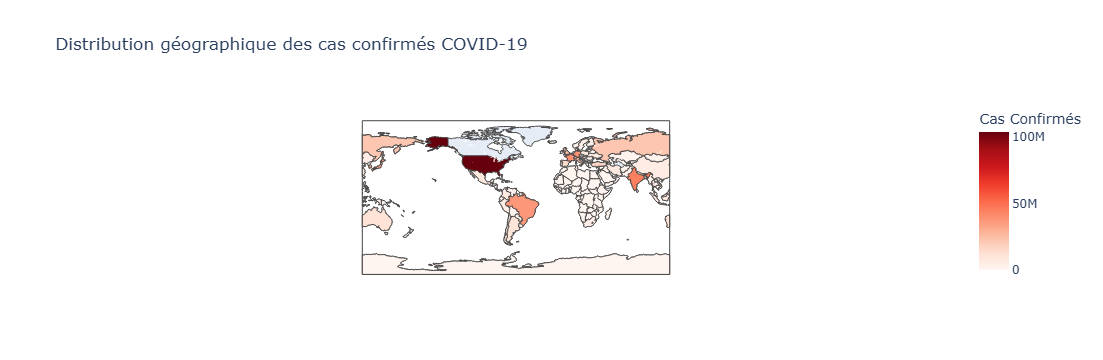

In [62]:
import plotly.express as px

# Carte choroplèthe des cas confirmés
fig = px.choropleth(
    latest_data,
    locations="Country/Region",               # Colonne des noms de pays
    locationmode="country names",             # Mode d'identification des pays
    color="Confirmed",                        # Colonne pour la couleur
    hover_name="Country/Region",              # Information affichée au survol
    title="Distribution géographique des cas confirmés COVID-19",
    color_continuous_scale="Reds",            # Palette de couleurs
    labels={"Confirmed": "Cas Confirmés"}     # Étiquettes pour la légende
)

# Afficher la carte
fig.show()

In [41]:
print(subset.columns)

Index(['Country/Region', 'Date', 'Province/State', 'Confirmed', 'Deaths',
       'Recovered', 'Mortality Rate (%)', 'Recovery Rate (%)'],
      dtype='object')


C:\Users\hp 830 G5\AppData\Local\Temp\ipykernel_16636\2675615544.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



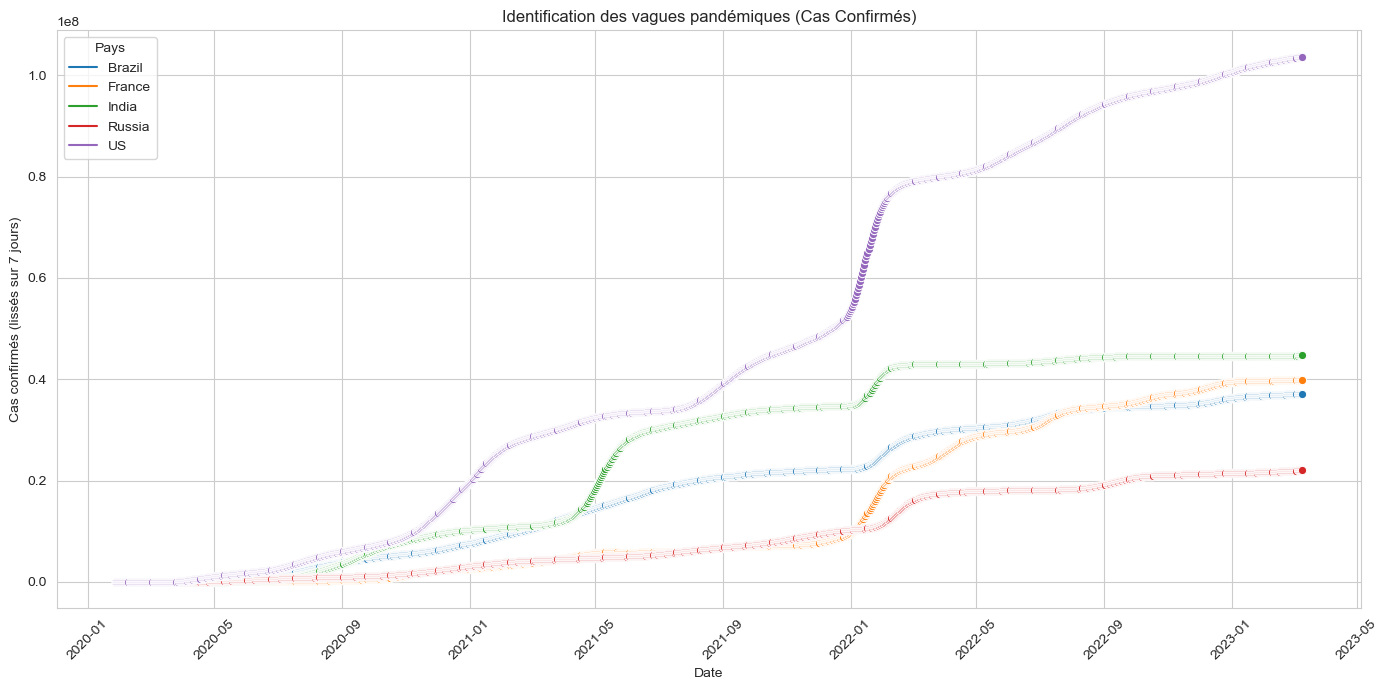

In [44]:
# Appliquer une moyenne mobile pour lisser les données
subset["Smoothed Confirmed"] = subset.groupby("Country/Region")["Confirmed"].transform(lambda x: x.rolling(window=7).mean())

# Tracer les vagues pandémiques
plt.figure(figsize=(14, 7))
sns.lineplot(data=subset, x="Date", y="Smoothed Confirmed", hue="Country/Region", marker="o")
plt.title("Identification des vagues pandémiques (Cas Confirmés)")
plt.xlabel("Date")
plt.ylabel("Cas confirmés (lissés sur 7 jours)")
plt.legend(title="Pays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
# Calcul du taux de mortalité (%)
aggregated_data["Mortality Rate (%)"] = (aggregated_data["Deaths"] / aggregated_data["Confirmed"]) * 100

# Remplacer les NaN ou inf par 0
aggregated_data["Mortality Rate (%)"] = aggregated_data["Mortality Rate (%)"].replace([float('inf'), -float('inf')], 0).fillna(0)

# Vérifiez les résultats
print(aggregated_data[["Country/Region", "Date", "Mortality Rate (%)"]].head())


  Country/Region       Date  Mortality Rate (%)
0    Afghanistan 2020-01-22                 0.0
1    Afghanistan 2020-01-23                 0.0
2    Afghanistan 2020-01-24                 0.0
3    Afghanistan 2020-01-25                 0.0
4    Afghanistan 2020-01-26                 0.0


# 

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



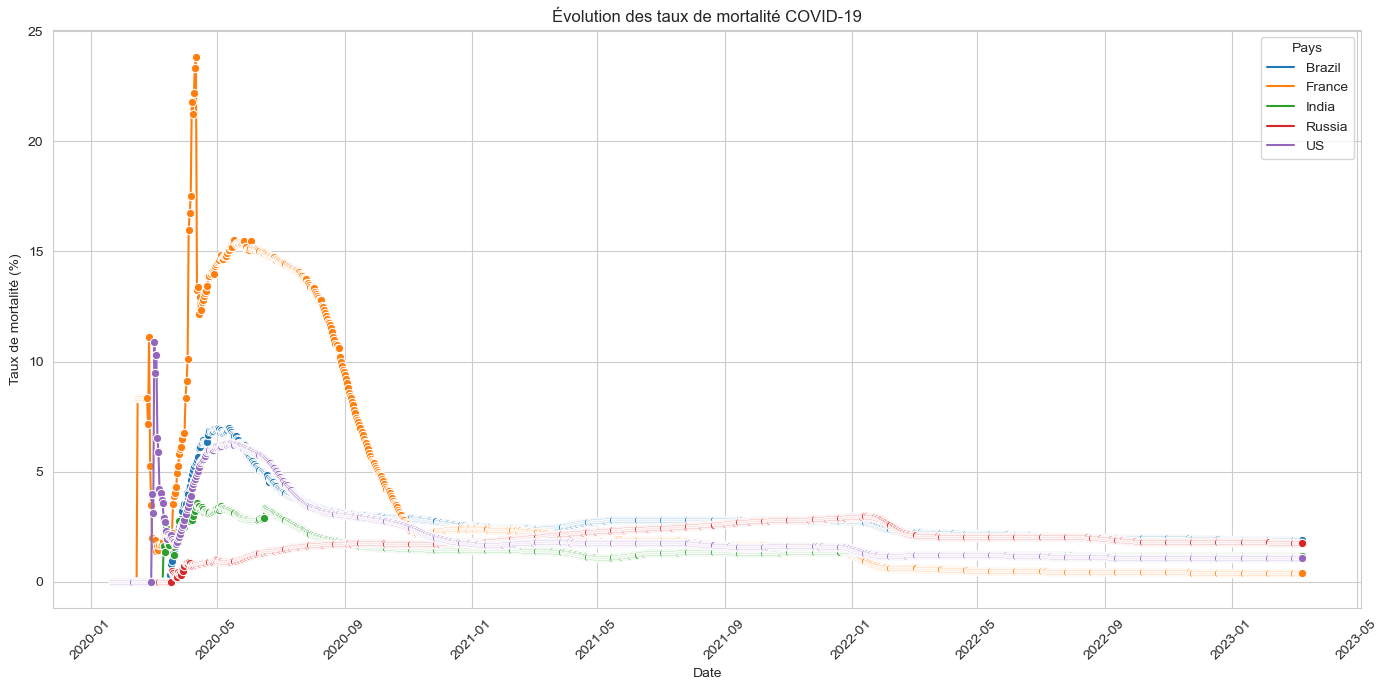

In [46]:
# Sélectionner quelques pays pour l'analyse
countries_to_visualize = ['US', 'India', 'Brazil', 'Russia', 'France']
subset = aggregated_data[aggregated_data["Country/Region"].isin(countries_to_visualize)]

# Tracer les taux de mortalité
plt.figure(figsize=(14, 7))
sns.lineplot(data=subset, x="Date", y="Mortality Rate (%)", hue="Country/Region", marker="o")
plt.title("Évolution des taux de mortalité COVID-19")
plt.xlabel("Date")
plt.ylabel("Taux de mortalité (%)")
plt.legend(title="Pays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



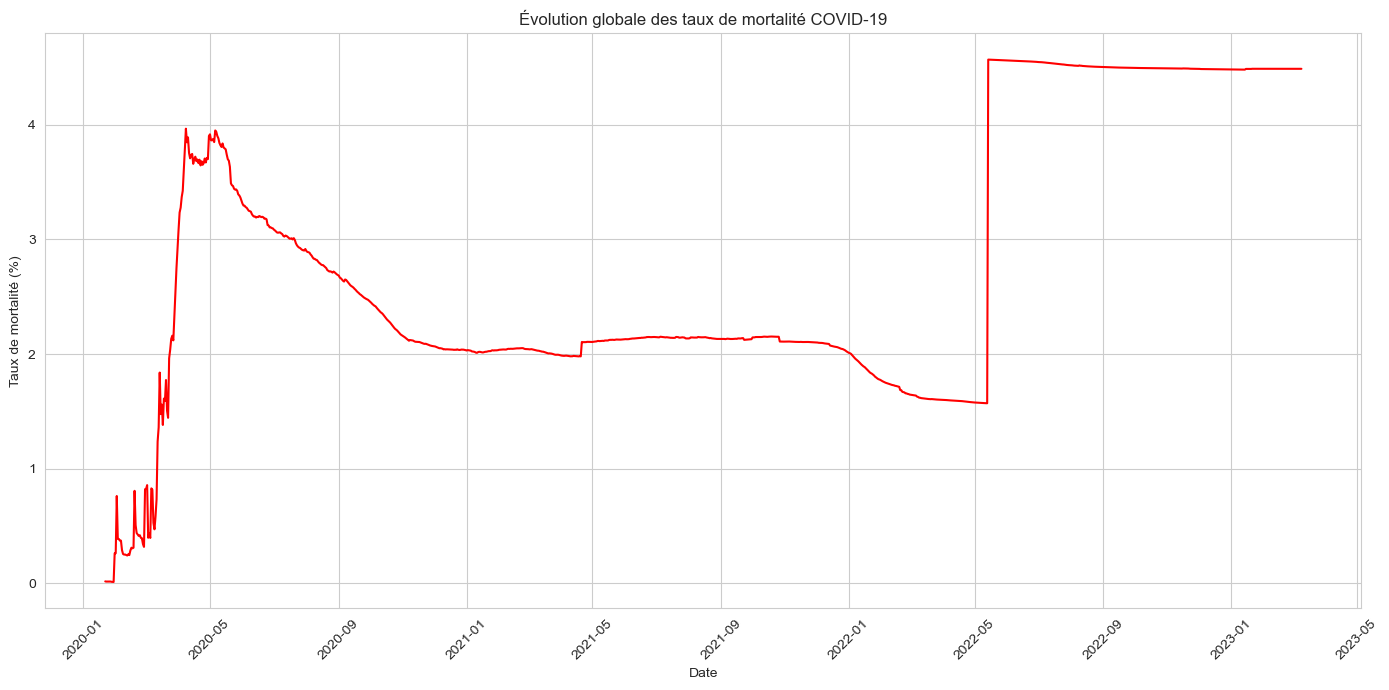

In [47]:
# Moyenne mondiale du taux de mortalité par date
global_mortality = aggregated_data.groupby("Date")["Mortality Rate (%)"].mean().reset_index()

# Tracer l'évolution temporelle globale
plt.figure(figsize=(14, 7))
sns.lineplot(data=global_mortality, x="Date", y="Mortality Rate (%)", color="red")
plt.title("Évolution globale des taux de mortalité COVID-19")
plt.xlabel("Date")
plt.ylabel("Taux de mortalité (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 

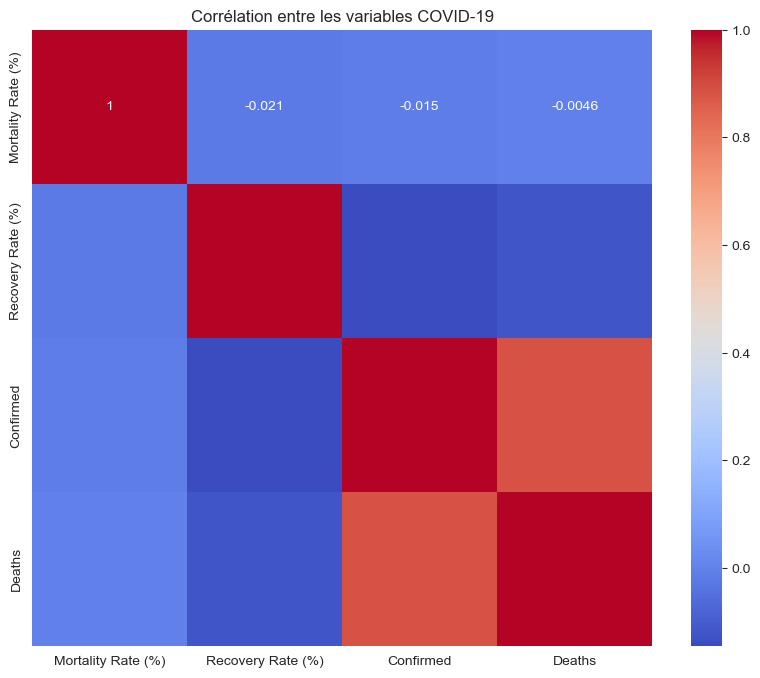

In [48]:
# Ajouter le taux de récupération si nécessaire
aggregated_data["Recovery Rate (%)"] = (aggregated_data["Recovered"] / aggregated_data["Confirmed"]) * 100

# Visualiser les corrélations entre les métriques
plt.figure(figsize=(10, 8))
sns.heatmap(aggregated_data[["Mortality Rate (%)", "Recovery Rate (%)", "Confirmed", "Deaths"]].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables COVID-19")
plt.show()

# 

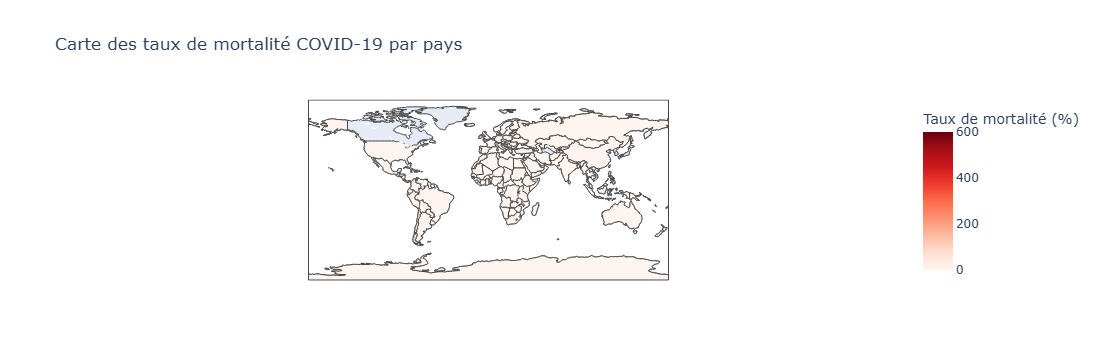

In [49]:
import plotly.express as px

# Dernières données disponibles (par date la plus récente)
latest_data = aggregated_data[aggregated_data["Date"] == aggregated_data["Date"].max()]

# Carte choroplèthe pour le taux de mortalité
fig = px.choropleth(
    latest_data,
    locations="Country/Region",
    locationmode="country names",
    color="Mortality Rate (%)",
    title="Carte des taux de mortalité COVID-19 par pays",
    color_continuous_scale="Reds",
    labels={"Mortality Rate (%)": "Taux de mortalité (%)"}
)
fig.show()

# 

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



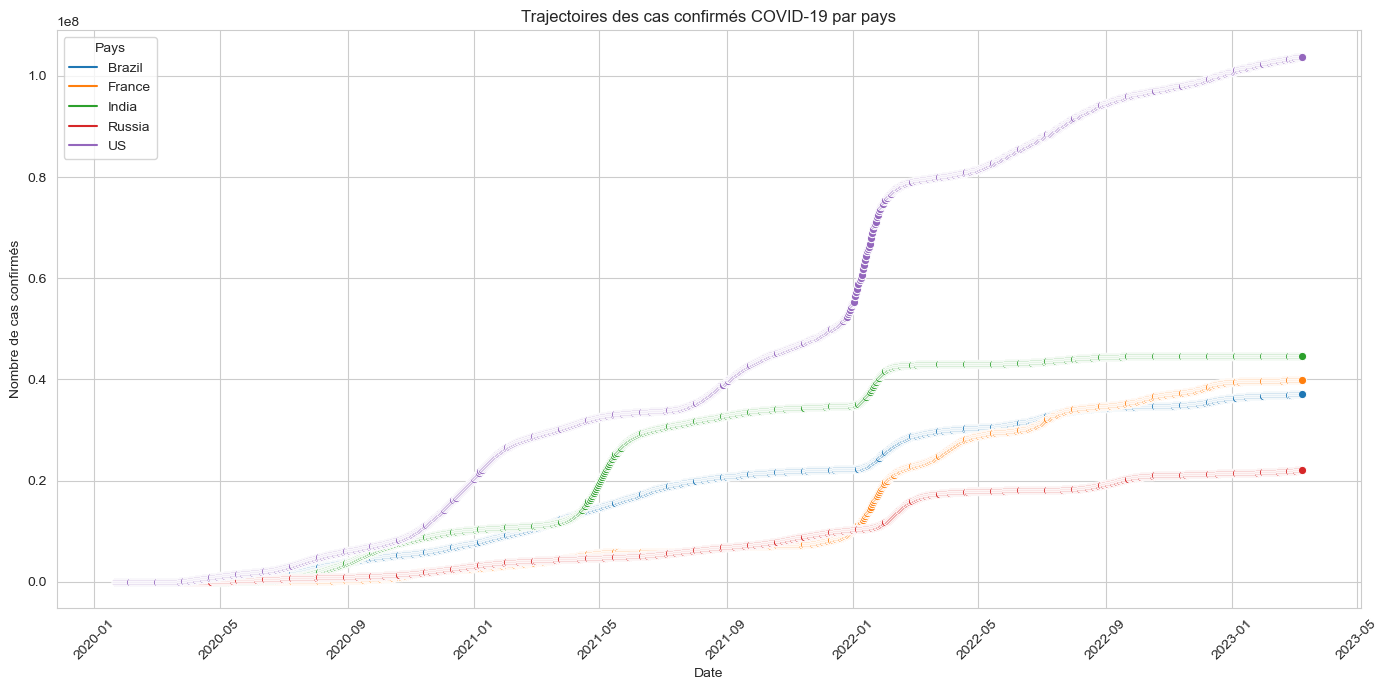

In [50]:
# Sélectionner des pays pour l'analyse
countries_to_compare = ['US', 'India', 'Brazil', 'Russia', 'France']
subset = aggregated_data[aggregated_data["Country/Region"].isin(countries_to_compare)]

# Comparer les trajectoires de cas confirmés
plt.figure(figsize=(14, 7))
sns.lineplot(data=subset, x="Date", y="Confirmed", hue="Country/Region", marker="o")
plt.title("Trajectoires des cas confirmés COVID-19 par pays")
plt.xlabel("Date")
plt.ylabel("Nombre de cas confirmés")
plt.legend(title="Pays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 

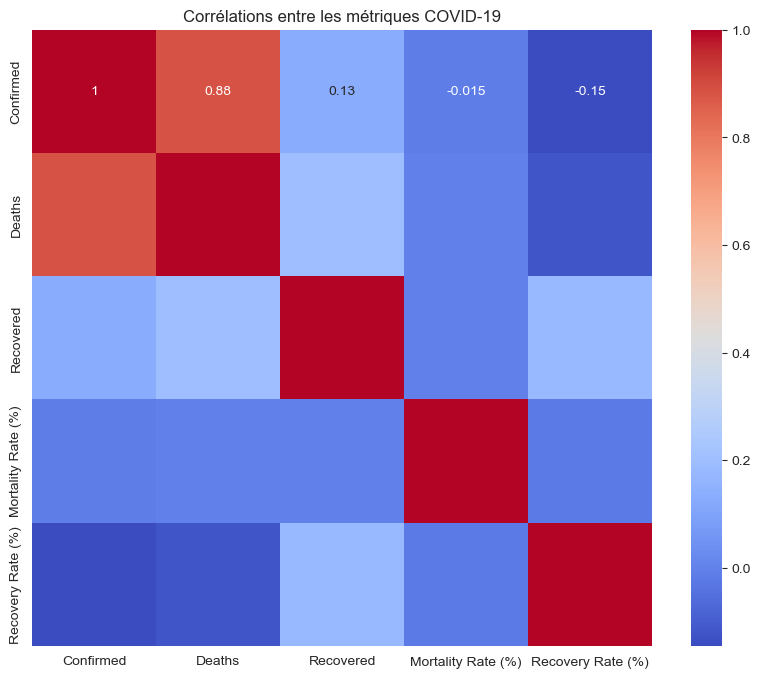

In [51]:
# Calcul des corrélations
correlation_matrix = aggregated_data[["Confirmed", "Deaths", "Recovered", "Mortality Rate (%)", "Recovery Rate (%)"]].corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Corrélations entre les métriques COVID-19")
plt.show()


# 

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



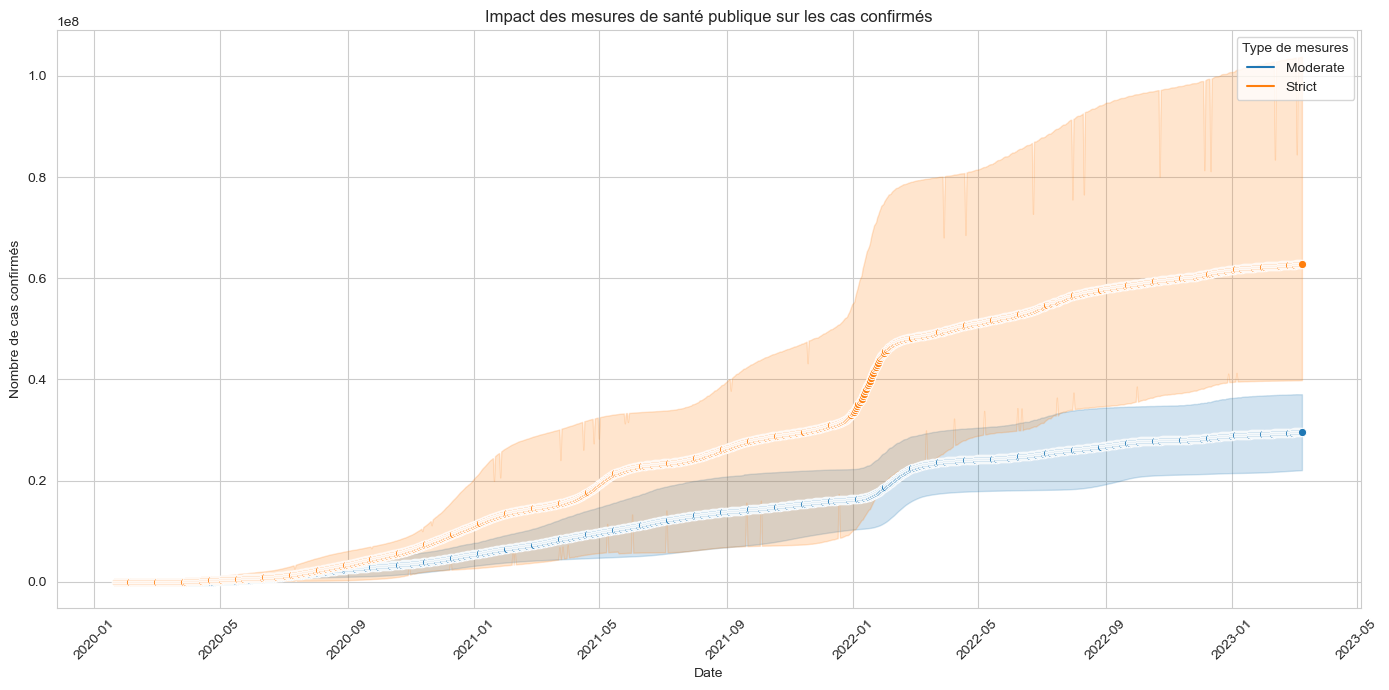

In [53]:
# Classifier les pays par type de mesures
measures = {
    "US": "Strict", "India": "Strict", "Brazil": "Moderate",
    "Russia": "Moderate", "France": "Strict"
}
aggregated_data["Measures"] = aggregated_data["Country/Region"].map(measures)

# Comparer les cas confirmés par type de mesures
plt.figure(figsize=(14, 7))
sns.lineplot(data=aggregated_data, x="Date", y="Confirmed", hue="Measures", marker="o")
plt.title("Impact des mesures de santé publique sur les cas confirmés")
plt.xlabel("Date")
plt.ylabel("Nombre de cas confirmés")
plt.legend(title="Type de mesures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
